In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# 1. Load the dataset
df_knn = pd.read_csv('/content/Admission_prediction.csv')

In [ ]:
# 2. Data Preprocessing Operations
print(df_knn.info())
print(df_knn.describe())
df_knn.fillna(df_knn.median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          482 non-null    float64
 2   TOEFL_Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB
None
       Serial No.   GRE_Score  TOEFL_Score  University Rating         SOP  \
count  500.000000  482.000000   490.000000         485.000000  500.000000   
mean   250.500000  316.597510   107.187755           3.121649    3.374000   
std    144.481833   11.281681     6.112899           1.146160    0.991004   
min 

In [ ]:
# 3. Ensure target is categorical
le_knn = LabelEncoder()
df_knn['Chance_of_Admit'] = le_knn.fit_transform(df_knn['Chance_of_Admit'])

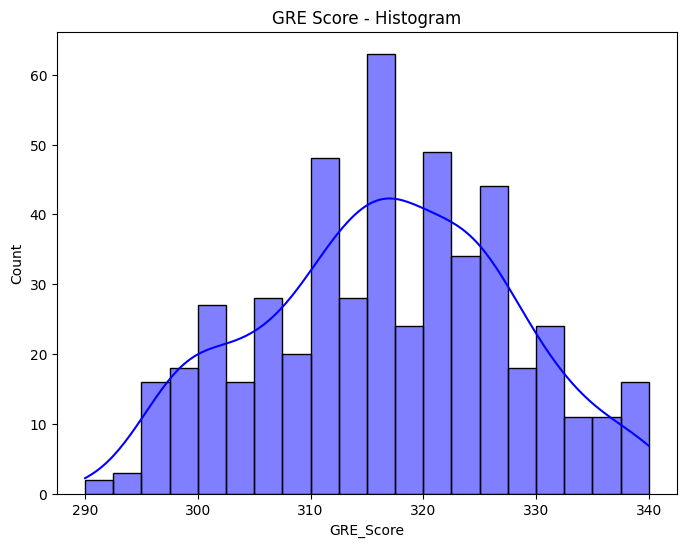

In [ ]:
# 4.Data visualization-Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_knn['GRE_Score'], bins=20, kde=True, color='blue')
plt.title('GRE Score - Histogram')
plt.show()

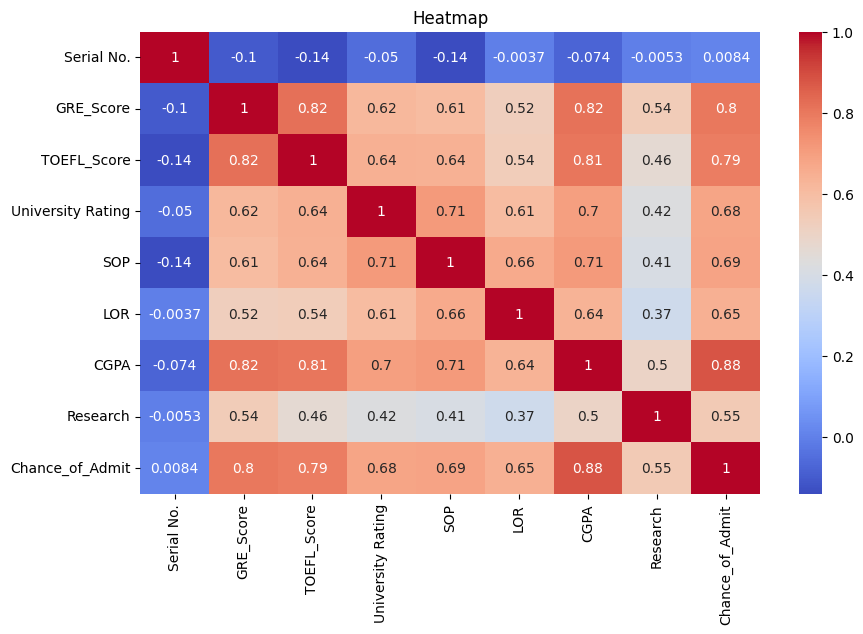

In [ ]:
# 5.Data visualization-Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_knn.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [ ]:
# 6. Define features and target
X_knn = df_knn.drop('Chance_of_Admit', axis=1)
y_knn = df_knn['Chance_of_Admit']

In [ ]:
# 7. Statistical methods
X_knn['mean'] = X_knn.mean(axis=1)
X_knn['median'] = X_knn.median(axis=1)
X_knn['std_dev'] = X_knn.std(axis=1)
X_knn['min'] = X_knn.min(axis=1)
X_knn['max'] = X_knn.max(axis=1)
# Print additional features
print("Additional Features for KNN:")
print(X_knn[['mean', 'median', 'std_dev', 'min', 'max']].head())

Additional Features for KNN:
       mean  median     std_dev  min    max
0  59.95625     4.5  106.277657  1.0  337.0
1  56.92125     4.5  101.715227  1.0  324.0
2  55.31250     3.5   99.637984  1.0  317.0
3  56.83375     4.0  101.420649  1.0  322.0
4  54.65125     5.0   98.679646  0.0  314.0


In [ ]:
# 8. Data Splitting
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [ ]:
# 9. Data Training
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [ ]:
# 10. Predictions
y_pred_knn = knn.predict(X_test_knn)

In [ ]:
# 11. Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_knn, y_pred_knn))

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
# 12. Accuracy, Precision, Recall, F1 Score
accuracy=accuracy_score(y_test_knn, y_pred_knn)
precision=precision_score(y_test_knn, y_pred_knn,average='weighted', zero_division=0)
recall=recall_score(y_test_knn, y_pred_knn,average='weighted', zero_division=0)
f1=f1_score(y_test_knn, y_pred_knn,average='weighted', zero_division=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.0700
Precision: 0.0450
Recall: 0.0700
F1 Score: 0.0517
